**Question 1 :**

La quantité $x_1$ correspond au nombre de proie qui augmente de $\alpha x_1$ (reproduction) et diminue de $\beta x_1 x_2$ (chasse par les prédateurs, proportionnel à la rencontre entre proie et prédateur).

La quantité $x_2$ correspond au nombre de prédateurs qui diminue de $\gamma x_1$ (mort) et augmente de $\delta x_1 x_2$.

On note $f : (x_1,x_2) \mapsto (x_1(\alpha-\beta x_2),-x_2(\gamma-\delta x_1))$. On remarque qu'il y a deux points fixes : $(0,0)$ et $(\frac{\gamma}{\delta},\frac{\alpha}{\beta})$.

$Jf((0,0))$ a pour valeur propre $\alpha > 0$ donc c'est un point fixe instable.
$Jf((\frac{\gamma}{\delta},\frac{\alpha}{\beta}))$ a deux valeurs propre à partie réelle nulle ($i\alpha \gamma$ et -$i\alpha \gamma$) donc c'est un point fixe instable également.


**Question 2 :**

In [88]:
import numpy as np
import matplotlib.pyplot as plt

alpha = 0.5
beta = 0.5
gamma = 0.5
delta = 0.5

In [89]:
xmax = 4
ymax = 4
nb_points = 10
x = np.linspace(0,xmax,nb_points)
y = np.linspace(0,ymax,nb_points)
np.meshgrid(x,y)

def derive(x,y):
        return (x*(alpha-beta*y),-y*(gamma-delta*x))

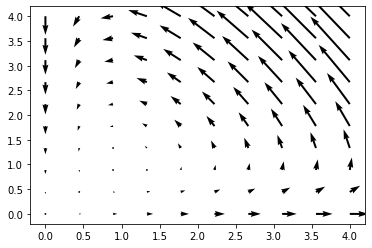

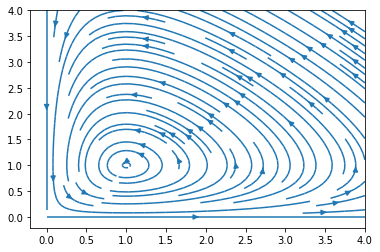

In [90]:
def affiche_vecteurs(x,y):
    def derive(x,y):
        return (x*(alpha-beta*y),-y*(gamma-delta*x))
    X,Y = np.meshgrid(x,y,sparse = True)
    vx,vy = derive(X,Y)
    plt.quiver(X,Y,vx,vy)
    plt.show()
    return

def affiche_portrait_phase(x,y):
    def derive(x,y):
        return (x*(alpha-beta*y),-y*(gamma-delta*x))
    X,Y = np.meshgrid(x,y,sparse = True)
    vx,vy = derive(X,Y)
    plt.streamplot(X,Y,vx,vy)
    plt.show()
    return

affiche_vecteurs(x,y)
affiche_portrait_phase(x,y)

**Question 3 :**

Supposons qu'une solution $x$ du système soit initialisée par $x(0)=x_0 \in \mathbb{R_+}^2$. Pour sortir de $\mathbb{R_+}^2$, $x$ doit croiser l'axe des abscisses ou des ordonnées.

S'il croise l'axe des abscisses en un certain $t_a$ alors $x_2(t_a)$ s'annule et donc $\dot x_2(t_a)$ aussi. Par conséquent $x_2(t_a + dt) = x_2(t_a) = 0 $ donc $\dot x_2(t_a + dt) = 0$ également. Par suite pour tout $t > t_a$, $x_2(t) = 0$ et $\dot x_2(t) = 0$ ce qui bloque $x_2$ sur l'axe des abscisses.  

De même, si $x$ croise l'axe des ordonnées en un certain $t_o$ alors $x_1(t_a)$ s'annule et donc $\dot x_1(t_a)$ aussi. Par conséquent $x_1(t_a + dt) = x_1(t_a) = 0 $ donc $\dot x_1(t_a + dt) = 0$ également. Par suite pour tout $t > t_o$, $x_1(t) = 0$ et $\dot x_1(t) = 0$ ce qui bloque $x_1$ sur l'axe des ordonnées.

Ainsi toute solution initialisée dans $x(0)=x_0 \in \mathbb{R_+}^2$ y demeure.

**Question 4 :**

$\frac{dH(x(t))}{dt} = < \nabla H(x(t)) | f(x) > = x_1(\delta - \frac{\gamma}{x_1})(\alpha-\beta x_2) - x_2(\beta - \frac{\alpha}{x_2})(\gamma - \delta x_1) = 0$

Donc $\forall t \in \mathbb{R+}$, $H(x(t)) = H(x(0)) = \delta x_1(0) - \gamma ln x_1(0) + \beta x_2(0) - \alpha ln x_2(0)$ avec $x_1(0)$ et $x_2(0)$ dans $\mathbb{R+}$

Supposons que $x$ tende vers $\pm\infty$ en un point $a$ de $\overline{\mathbb{R}}$.   
Posons un changement de coordonées $x_1 = \rho cos \theta$ et $x_2 = \rho sin \theta$.   
On a alors $\rho \to +\infty$ en $a$.   
Donc $||H(x)|| = \rho ||cos \theta(\delta - \gamma \frac{ln(\rho cos \theta)}{\rho cos \theta}) + sin \theta(\beta - \alpha \frac{ln(\rho sin \theta)}{\rho sin \theta})|| \to +\infty$ en $a$.   
Or c'est impossible car $H(x)$ est constant.  
On en déduit donc que $x$ ne diverge en aucun point de $\overline{\mathbb{R}}$, donc $x$ est bornée sur $\mathbb{R}$.

**Question 5 :**

<ipython-input-91-d14026afd253>:16: RuntimeWarning: divide by zero encountered in log
  return delta*x-gamma*np.log(x)+beta*y-alpha*np.log(y)


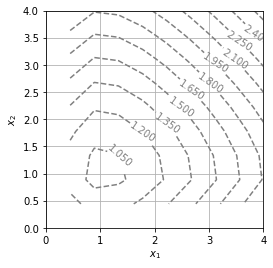

In [91]:
def display_contour(f, x, y, levels):
    X, Y = np.meshgrid(x, y)
    Z = f(X, Y)
    fig, ax = plt.subplots()
    contour_set = plt.contour(
        X, Y, Z, colors="grey", linestyles="dashed", 
        levels=levels 
    )
    ax.clabel(contour_set)
    plt.grid(True)
    plt.xlabel("$x_1$") 
    plt.ylabel("$x_2$")
    plt.gca().set_aspect("equal")

def H(x,y):
    return delta*x-gamma*np.log(x)+beta*y-alpha*np.log(y)

display_contour(H,x,y,levels = 10)

$\bar{x}$ se situe au centre des lignes de niveau. C'est le point le plus bas de H. $\bar{x}$ est donc stable, car une petite perturbation ne va pas éloigner le système fortement de $\bar{x}$.


**Question 6 :**

In [92]:
def solve_euler_explicit(f,x0,dt,t0,tf):
    """Fonction permettant de résoudre une équa diff du type x' = f(x,t) selon la 
    méthode d'euler explicite.
    
    parameters
    ----------
    f : function
        fonction de RxR**n dans R**n.
    x0 : np.ndarray
        condition initiale.
    dt : float
        pas de temps.
    t0,tf : float
        temps initial et final.
    
    returns 
    -------
    T : np.ndarray
        vecteur contenant le temps.
    X : np.ndarray
        tableau contenant les différents points calculés selon la méthode d'euler explicite.
        
    """
    t = t0
    T = np.array([t0])
    X = np.array([x0])
    while t < tf :
        t += dt
        x = np.array(X[-1]) + dt*f(T[-1],X[-1])
        X = np.vstack([X,x])
        T = np.append(T,t)
    return T,X

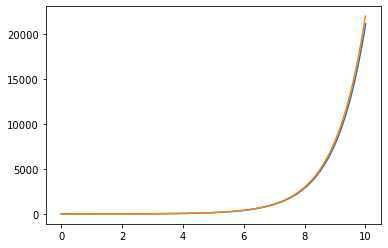

In [105]:
#test : 
dt = 1e-2
ti = 0
tf = 10

def fonction_simple(t,x):
    return np.array([x])

x = solve_euler_explicit(fonction_simple,1,dt,ti,tf)
plt.plot(x[0],x[1])
plt.plot(np.arange(0,10,1e-4),np.exp(np.arange(0,10,1e-4)))
plt.show()

**Question 7 :**

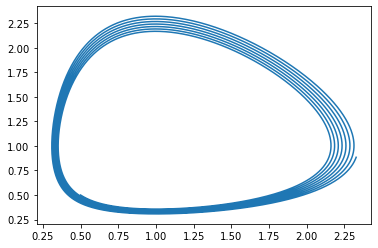

In [106]:
dt = 1e-2
ti = 0
tf = 100

def derive(t,x):
        return np.array([x[0]*(alpha-beta*x[1]),-x[1]*(gamma-delta*x[0])])

t,x = solve_euler_explicit(derive,np.array([0.5,0.5]),dt,ti,tf)
plt.plot(x[:,0],x[:,1])
plt.show()


évolution de la fonction H :


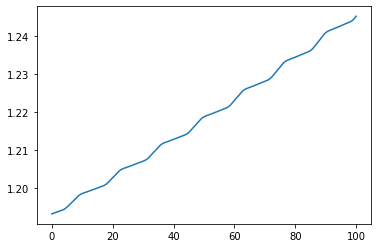

In [107]:
print("\névolution de la fonction H :")
plt.plot(t,H(x[:,0],x[:,1]))
plt.show()

**Question 8 :**

In [96]:
def solve_euler_implicit(f,x0,dt,t0,tf,itermax = 100,precision = 1e-5):
    x1 = x0
    t = t0
    global H0
    if np.shape(x0) == (2,):
        H0 = H(x0[0],x0[1])
    T = np.array([t0])
    X = np.array([x0])
    while t < tf :
        x = x1 + dt*f(t,x1)
        i = 0
        def F(t,x):
            return x1 + dt*f(t+dt,x)
        while i < itermax and np.all((F(t,x) - x)/x1 > precision):
            x = F(t,x)
            i += 1
        x1 = x
        X = np.vstack([X,x])
        T = np.append(T,t)
        t += dt
    return T,X 

def display_contour_and_function(f, x, y, levels,x_fonction,y_fonction):
    X, Y = np.meshgrid(x, y)
    Z = f(X, Y)
    fig, ax = plt.subplots()
    contour_set = plt.contour(
        X, Y, Z, colors="grey", linestyles="dashed", 
        levels=levels 
    )
    ax.clabel(contour_set)
    plt.grid(True)
    plt.xlabel("$x$") 
    plt.ylabel("$y$")
    plt.plot(x_fonction,y_fonction)
    plt.gca().set_aspect("equal")

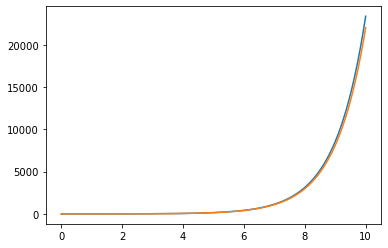

In [108]:
#test : 
dt = 1e-2
ti = 0
tf = 10

def fonction_simple(t,x):
    return np.array(x)

x = solve_euler_implicit(fonction_simple,1,dt,ti,tf)

plt.plot(x[0],x[1])
plt.plot(np.arange(0,10,1e-4),np.exp(np.arange(0,10,1e-4)))
plt.show()

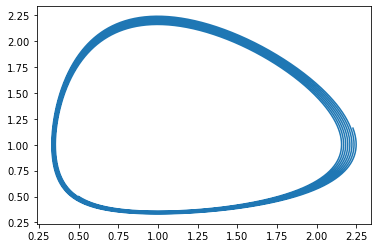

In [109]:
dt = 1e-2
ti = 0
tf = 100

def derive(t,x):
        return np.array([x[0]*(alpha-beta*x[1]),-x[1]*(gamma-delta*x[0])])

t,x = solve_euler_implicit(derive,np.array([0.5,0.5]),dt,ti,tf)
plt.plot(x[:,0],x[:,1])
plt.show()

<ipython-input-91-d14026afd253>:16: RuntimeWarning: divide by zero encountered in log
  return delta*x-gamma*np.log(x)+beta*y-alpha*np.log(y)


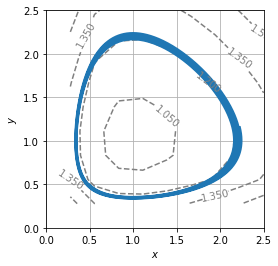

In [110]:
xmax = 2.5
ymax = 2.5
nb_points = 10
x_contour = np.linspace(0,xmax,nb_points)
y_contour = np.linspace(0,ymax,nb_points)
    
display_contour_and_function(H,x_contour,y_contour,3,x[:,0],x[:,1])


évolution de la fonction H :


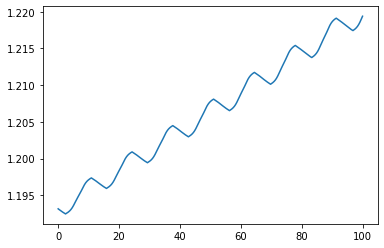

In [111]:
print("\névolution de la fonction H :")
plt.plot(t,H(x[:,0],x[:,1]))
plt.show()

**Question 9 :**

Si $x_a$ est solution du système de Lotka-Volterra, on a vu que $H(x_a(t)) = H(x_a(0))$ pour tout $t$ dans $\mathbb{R}$. Donc si $H_0 = H(x(0))$ alors $H(x_1,x_2) - H_0$ est la fonction nulle ce qui assure que $x_a$ est aussi solution du schéma modifié.  

Réciproquement considérons une solution $x_b$ du schéma modifié. Soit $x_a$ solution du système de Lotka-Volterra telle que $x_a(0)=x_b(0)$ (existe par Cauchy-Lipschitz). D'après le point précédent $x_a$ est aussi solution du schéma modifié. Donc x_a et x_b sont deux solutions continuement différentiables du même système différentiel initialisées au même point. Donc d'après le théorème de Cauchy-Lipschitz $x_a = x_b$. Donc $x_b$ est aussi solution du système de Lotka-Volterra.   

Les deux systèmes sont donc équivalents.

**Question 10 :**

On note $f_1 : (x_1,x_2) \mapsto (x_1(\alpha-\beta x_2) - u_1(x_1,x_2)(H(x_1,x_2)-H_0),-x_2(\gamma-\delta x_1) - u_2(x_1,x_2)(H(x_1,x_2) - H_0))$.

$\frac{dH(x(t))}{dt} = < \nabla H(x(t)) | f_1(x) > = (\delta - \frac{\gamma}{x_1})[x_1(\alpha-\beta x_2) - u_1(x_1,x_2)(H(x_1,x_2)-H_0)] - (\beta-\frac{\alpha}{x_2})[x_2(\gamma-\delta x_1) - u_2(x_1,x_2)(H(x_1,x_2) - H_0)]$    
Donc : $\frac{dH(x(t))}{dt} = -[(\delta - \frac{\gamma}{x_1})u_1(x_1,x_2) + (\beta-\frac{\alpha}{x_2})u_2(x_1,x_2)](H(x_1,x_2) - H_0)$    
En prenant $u(x_1,x_2)=k\nabla H(x(t))$ avec k dans $\mathbb{R+}$  
On a : $\frac{dH(x(t))}{dt} = -k< \nabla H(x(t)) | \nabla H(x(t)) >(H(x_1,x_2)-H_0)$   
D'où : $\frac{d(H(x(t))-H_0)}{dt} = -k||\nabla H(x(t))||^2(H(x_1,x_2)-H_0)$   
Or : $\nabla H(x(t)) = (\delta - \frac{\gamma}{x_1},\beta - \frac{\alpha}{x_2})$ et $||x-\overline{x}|| > c > 0$    
Donc : $x_1 - \frac{\gamma}{\delta} > 0$ ou $x_2 - \frac{\alpha}{\beta} > 0$  
Donc : $\delta - \frac{\gamma}{x_1} > 0$ ou $\beta - \frac{\alpha}{x_2} > 0$  
D'où : $||\nabla H(x(t))|| > 0$   
Donc : Il existe $M,m > 0$, $m > ||\nabla H(x(t))|| > M$  
Donc : $-km^2(H(x_1,x_2)-H_0) \leq \frac{dH(x(t))-H_0}{dt} \leq -kM^2(H(x_1,x_2)-H_0)$  
D'où : $\lambda e^{-km^2 x} \leq H(x)-H_0 \leq \lambda e^{-kM^2 x}$ avec $\lambda$ dans $\mathbb{R}$.

**Question 11 :**

Pour assurer la stabilité de H, il faut implémenter le schéma d'Euler avec comme dérivée la fonction :

\begin{align*}
 \dot{x}_1 &= x_1(\alpha -\beta x_2) - u_1(x_1,x_2) (H(x_1,x_2)-H_0) \\
 \dot{x}_2 &= -x_2(\gamma - \delta x_1) - u_2(x_1,x_2) (H(x_1,x_2)-H_0) 
 \end{align*}

le rôle de k est d'empécher la divergence de $\|H(x_1,x_2)-H_0\|$, c'est à dire d'assurer que $H(x_1,x_2)$ converge bien vers $H_0$ durant le calcul itératif. k ne peut toutefois pas être choisi arbitrairement grand, car le développement limité au premier ordre en dt donne : 

$$H(x^{j+1}) - H_0 \\ = H(x^{j}) - H_0 + \frac{d }{dt} (H(x^{j}))-H_0)dt\\
= H(x^{j}) - H_0 - k\| \nabla H(x^{j}) \| ^2  (H(x^{j}))-H_0)dt \\
= (1 - k\| \nabla H(x^{j}) \| ^2  dt )  (H(x^{j}))-H_0)$$

On voit que si k est trop grand, ou si dt l'est, alors le signe de l'égalité change. Or on a vu que $H$ converge vers $H_0$ expenentiellement, donc la différence des 2 a un signe constant. Un k trop grand empecherait par conséquent la convergence de $H$ vers $H_0$

In [101]:
def u(x1,x2):
    h = H(x1,x2)
    u1 = k*(delta-gamma/x1)
    u2 = k*(beta-alpha/x2)
    return u1,u2

def derive_upgraded(t,x):
    x1 = x[0]
    x2 = x[1]
    u1,u2 = u(x1,x2)
    h = H(x1,x2)
    return np.array([x1*(alpha-beta*x2)-u1*(h-H0),-x2*(gamma-delta*x1)-u2*(h-H0)])

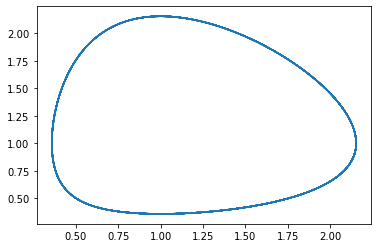

In [102]:
k = 100
dt = 1e-2
ti = 0
tf = 100

t,x = solve_euler_implicit(derive_upgraded,np.array([0.5,0.5]),dt,ti,tf)
plt.plot(x[:,0],x[:,1])
plt.show()

In [103]:
print("H : ",H(x[-1,0],x[-1][1]))
print("H_0 : ",H(0.5,0.5))
print("Différence : ",H(x[-1,0],x[-1][1])-H(0.5,0.5))

H :  1.1932385895766164
H_0 :  1.1931471805599454
Différence :  9.140901667104018e-05



 évolution de la fonction H :


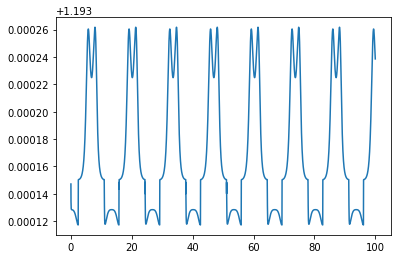

In [104]:
print("\n évolution de la fonction H :")
plt.plot(t,H(x[:,0],x[:,1]))
plt.show()